# Movie Analysis

1. Hvilket production companies har den største indtjening?
3. Er der sammenhæng i hvornår en film bliver udgivet på året i forhold til hvor stor indtjening filmen får?
4. Er der en sammenhæng mellem en films budget og dens revenue?
5. Er der en sammenhæng mellem user-rating og profit?

5. hvilke genre er den som flest film har?
6. Vis et bar plot med den gennemsnitlige rating for alle genre
7. Vis et bar plot med den gennemsnitlige revenue for alle genre
8. Hvilke production companies har lavet flest film

In [1]:
import modules.Analyser.Analyser as an

#### Getting data
We are going to use data about movies. We load our datasets from our folder "data".

#### Preparing

In [2]:
data = an.prepare_data()
data.head()

C:\Users\ch__s\OneDrive\Documents\Datamatiker cph business\4th semester\python\Exam project\MovieMatch\modules\Analyser\Analyser.py:27: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['release_date'] = pd.to_datetime(data['release_date'])


,budget,genres,id,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,original_language,production_companies,years,profit
0,30000000.0,Animation,862.0,Toy Story,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0,en,Pixar Animation Studios,1995.0,343554033.0
1,65000000.0,Adventure,8844.0,Jumanji,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0,en,TriStar Pictures,1995.0,197797249.0
3,16000000.0,Comedy,31357.0,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0,en,Twentieth Century Fox Film Corporation,1995.0,65452156.0
5,60000000.0,Action,949.0,Heat,17.924927,1995-12-15,187436818.0,170.0,7.7,1886.0,en,Regency Enterprises,1995.0,127436818.0
8,35000000.0,Action,9091.0,Sudden Death,5.231580,1995-12-22,64350171.0,106.0,5.5,174.0,en,Universal Pictures,1995.0,29350171.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5192 entries, 0 to 45412
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                5192 non-null   float64       
 1   genres                5192 non-null   object        
 2   id                    5192 non-null   float64       
 3   original_title        5192 non-null   object        
 4   popularity            5192 non-null   float64       
 5   release_date          5192 non-null   datetime64[ns]
 6   revenue               5192 non-null   float64       
 7   runtime               5192 non-null   float64       
 8   vote_average          5192 non-null   float64       
 9   vote_count            5192 non-null   float64       
 10  original_language     5192 non-null   object        
 11  production_companies  5192 non-null   object        
 12  years                 5192 non-null   float64       
 13  profit           

In [4]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,years,profit
count,5.192000e+03,5192.000000,5192.000000,5.192000e+03,5192.000000,5192.000000,5192.000000,5192.000000,5.192000e+03
mean,3.208299e+07,59974.410632,10.055392,9.340624e+07,110.181048,6.292488,758.077812,1999.641757,6.132325e+07
std,4.053504e+07,95732.886590,13.978851,1.683179e+08,21.393263,0.886712,1266.629605,16.081147,1.415926e+08
min,1.000000e+00,5.000000,0.030576,1.000000e+00,26.000000,1.700000,1.000000,1915.000000,-1.657101e+08
25%,6.000000e+06,8396.750000,5.798291,8.194642e+06,96.000000,5.800000,90.000000,1994.000000,-1.421798e+06
50%,1.800000e+07,13909.500000,8.583707,3.218650e+07,106.000000,6.300000,294.000000,2004.000000,1.252549e+07
75%,4.000000e+07,58579.250000,11.845310,1.028330e+08,120.000000,6.900000,844.000000,2011.000000,6.568149e+07
max,3.800000e+08,443319.000000,547.488298,2.787965e+09,338.000000,9.100000,14075.000000,2017.000000,2.550965e+09


# Genres

Drama              1259
Comedy             1024
Action              933
Adventure           409
Horror              320
Crime               261
Thriller            194
Animation           144
Fantasy             138
Romance             117
Science Fiction     104
Mystery              65
Family               55
Documentary          37
War                  37
Music                33
Western              31
History              26
Foreign               4
TV Movie              1
Name: genres, dtype: int64


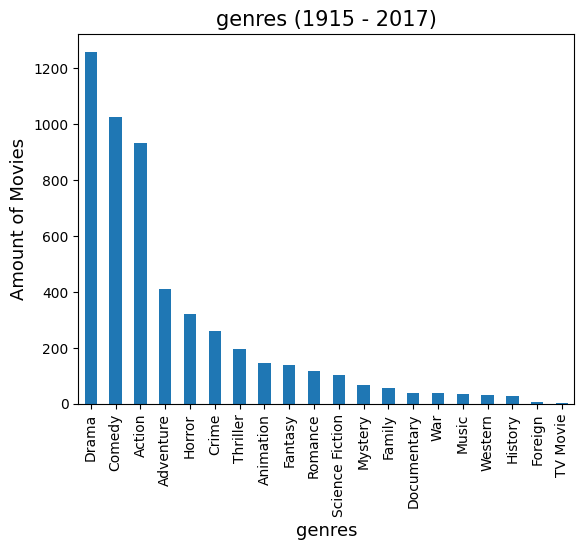

In [5]:
an.plot_genre(data,'genres')

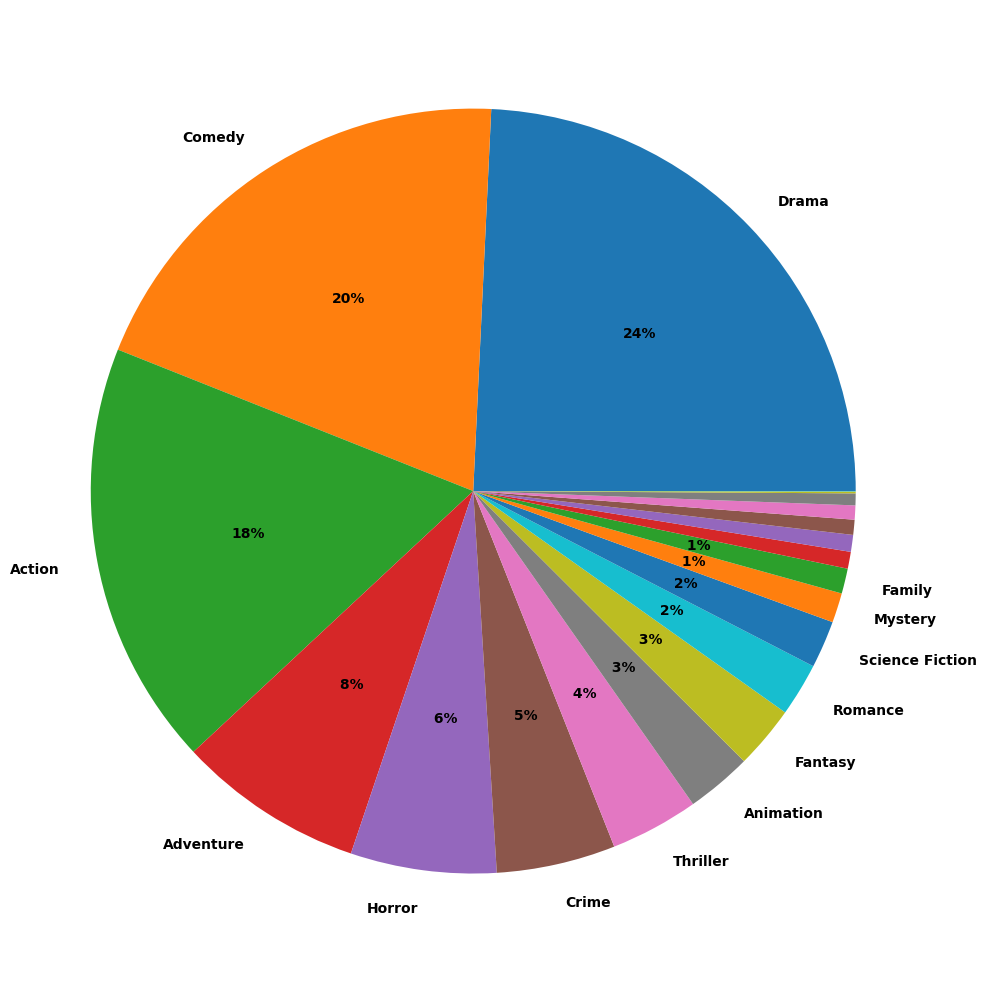

In [6]:
an.plot_genre_pie(data, 'genres')

#### Can we see a linear association between the budget and the revenue features?

We will now try to see if we can see a linear association between the budget and revenue features, to figure out if we can explain a relation between the two features

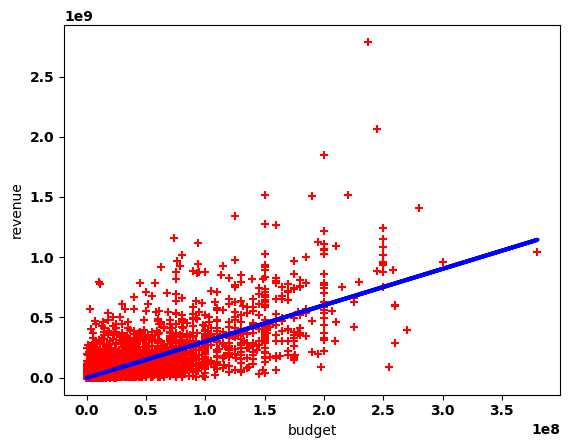

In [7]:
# shows linear regression plot
an.linear_regression_func(data,'budget','revenue')

In [8]:
# how strong is the linear relation between the budget and revenue?
an.correlator(data, 'budget','revenue')

Correlation between budget and revenue  is:  0.7273841571022678


C:\Users\ch__s\OneDrive\Documents\Datamatiker cph business\4th semester\python\Exam project\MovieMatch\modules\Analyser\Analyser.py:59: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


In [9]:
# predict the revenue and proft for a 3.000.000 dollar movie-budget
budget = 3000000
predict_revenue = an.revenue_predict(data,'budget','revenue', budget)
print("Predicted revenue: {}".format(round(predict_revenue, ndigits=2)))
profit = predict_revenue - budget
print("Predicted profit: {}".format(round(profit, ndigits=2)))

Predicted revenue: 5564171.09
Predicted profit: 2564171.09


#### Can we see a linear association between the popularity and the profit features?

We will now try to see if we can see a linear association between the popularity and profit features, to figure out if we can explain a relation between the two features.

Are you sure you will get a high profit for a movie with a high user-rating?

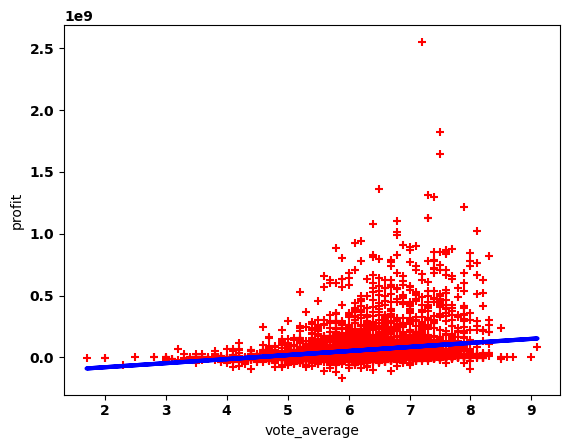

In [10]:
# shows linear regression plot
an.linear_regression_func(data,'vote_average','profit')

In [11]:
# how strong is the linear relation between the vote average and revenue?
an.correlator(data,'vote_average','profit')

Correlation between vote_average and profit  is:  0.20523983246067168


C:\Users\ch__s\OneDrive\Documents\Datamatiker cph business\4th semester\python\Exam project\MovieMatch\modules\Analyser\Analyser.py:59: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


#### Average revenue by month

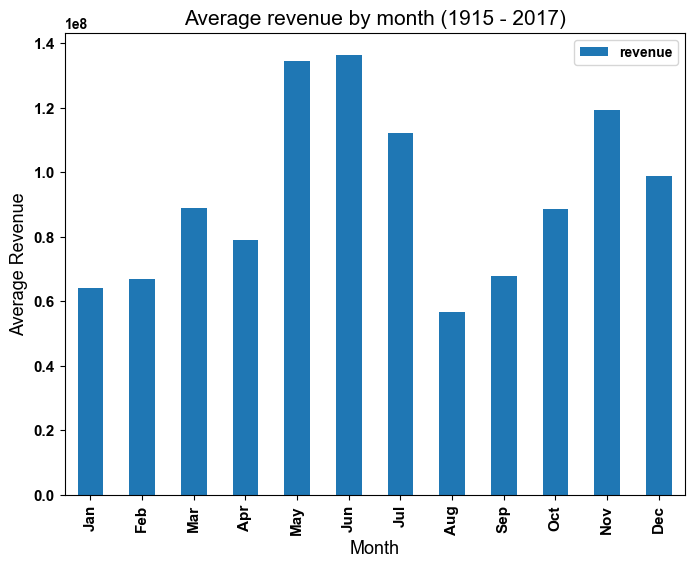

In [12]:
an.average_revenue_by_month(data)

#### Heatmap
Which features is

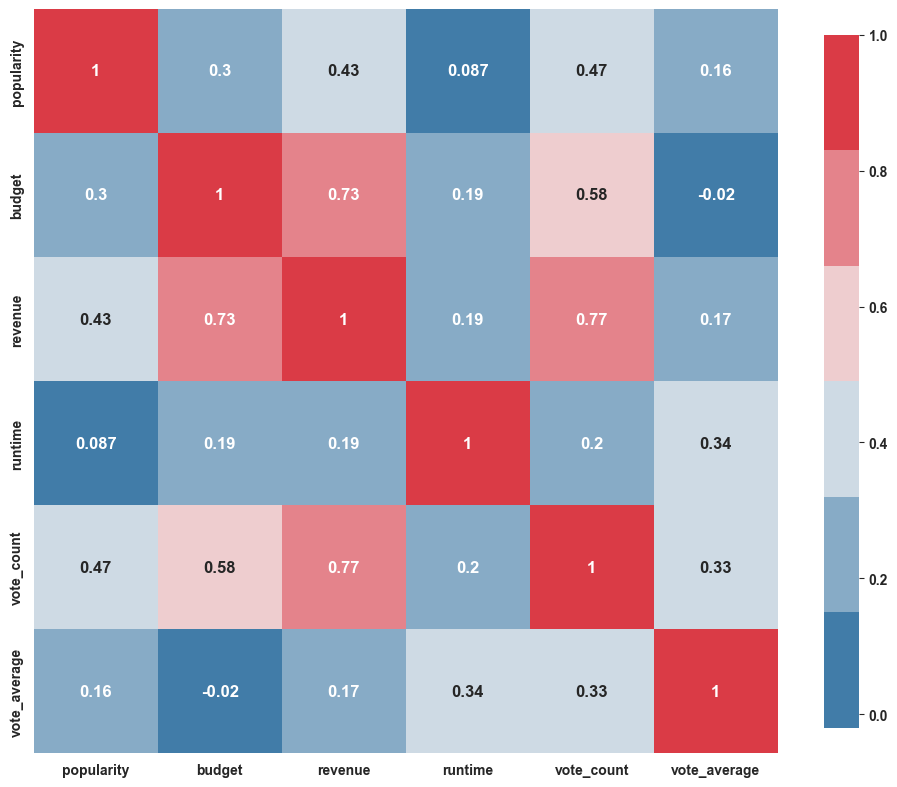

In [13]:
an.plot_correlation_map(data[['popularity','budget','revenue','runtime','vote_count','vote_average']])

Shape: (5192, 2)
                        production_companies  movies
872                       Paramount Pictures     336
1245                      Universal Pictures     329
1228  Twentieth Century Fox Film Corporation     247
259                        Columbia Pictures     209
796                          New Line Cinema     164


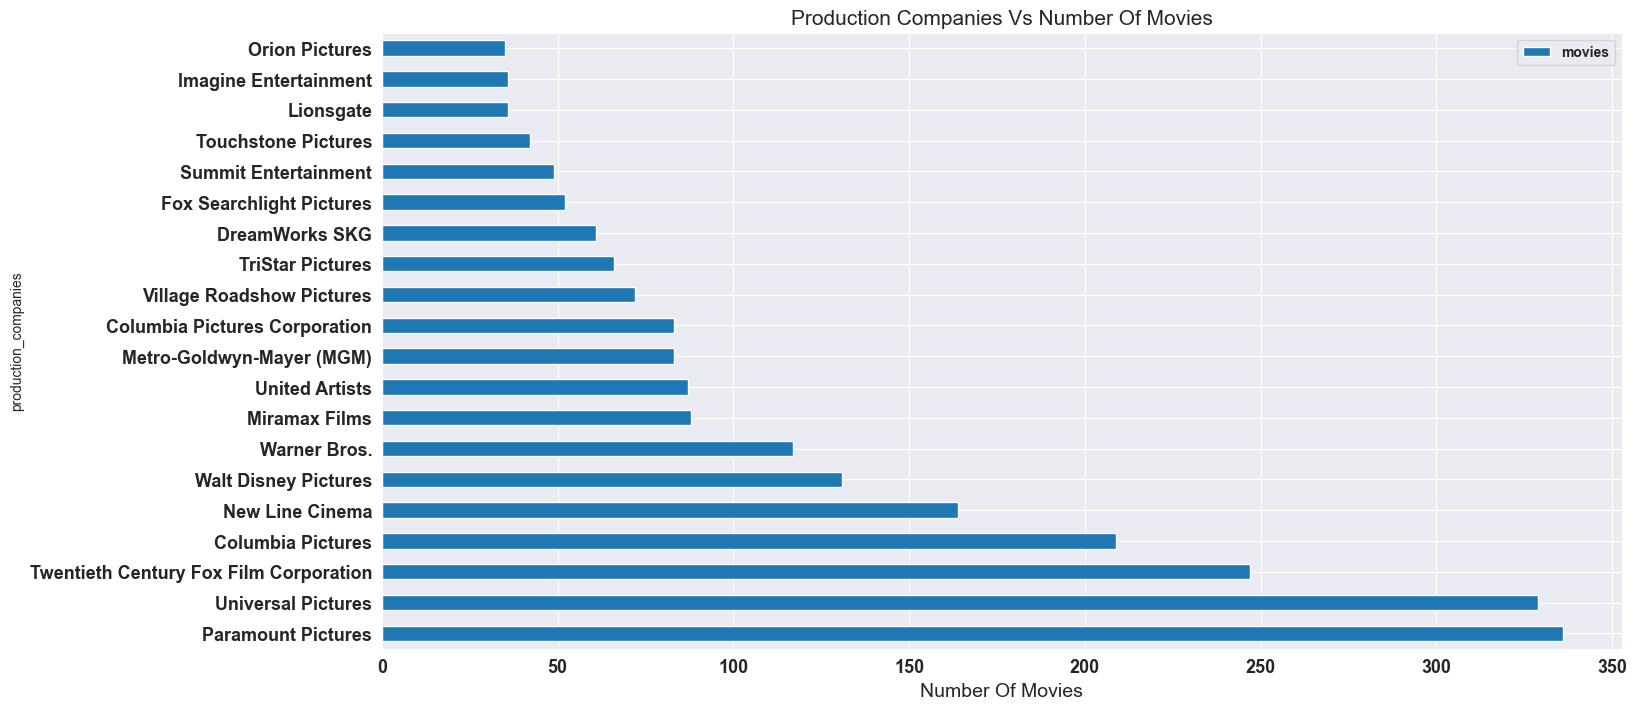

In [14]:
an.plot_production_company(data)

,revenue
genres,
Animation,2.440467e+08
Family,2.406010e+08
Adventure,2.020213e+08
Science Fiction,1.665982e+08
Fantasy,1.346339e+08
Action,1.265588e+08
Thriller,7.650982e+07
History,7.492920e+07
Romance,7.248124e+07


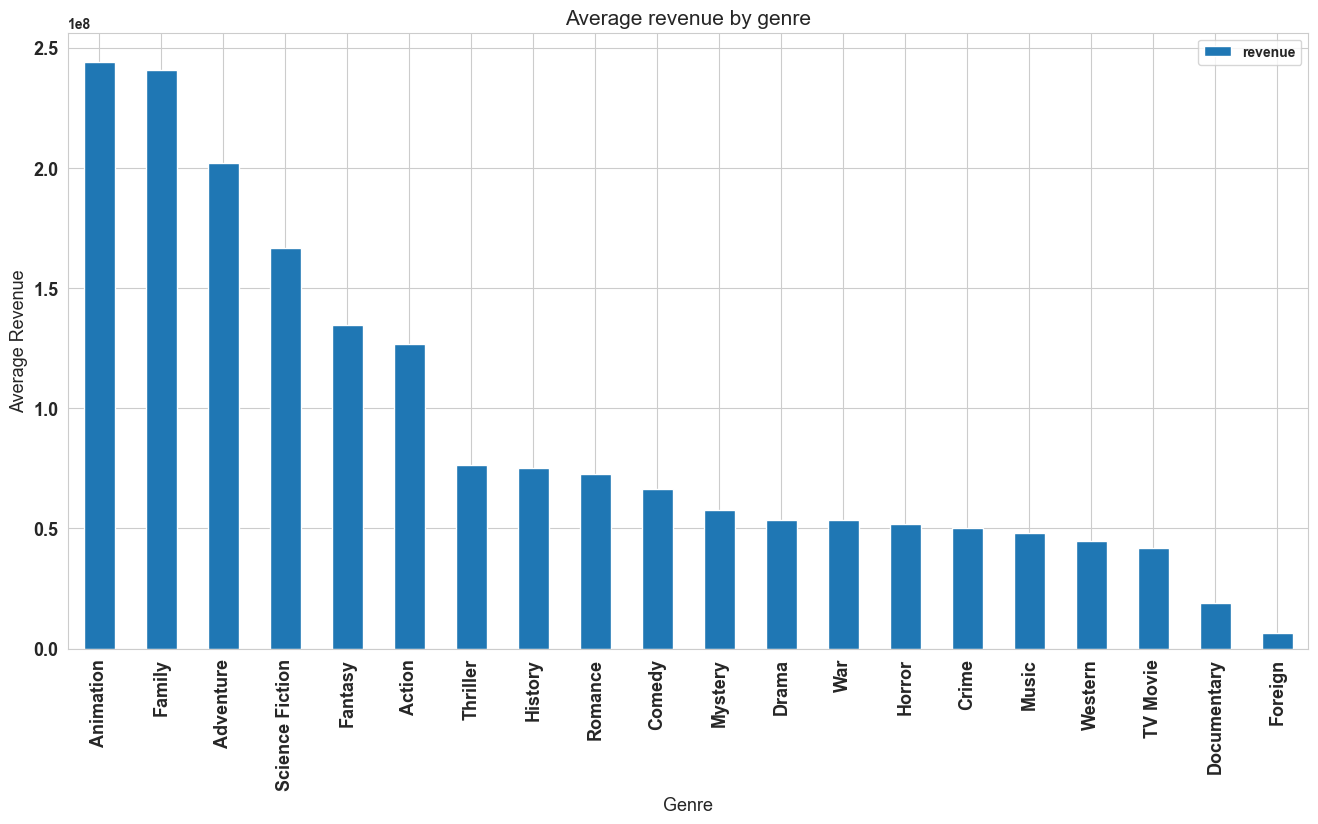

In [15]:
an.plot_average_revenue_by_genre(data)
an.average_revenue_by_genre(data)

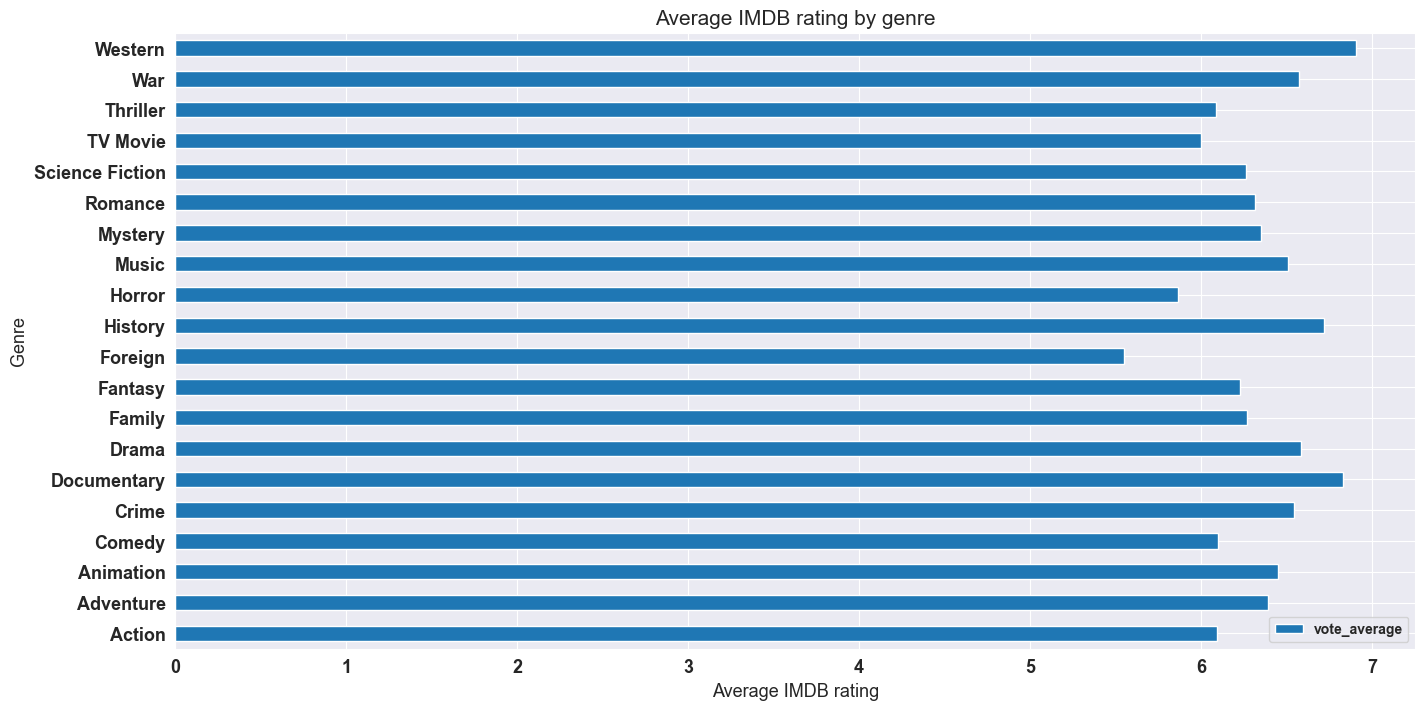

In [16]:
an.plot_average_ratings_by_genre(data)

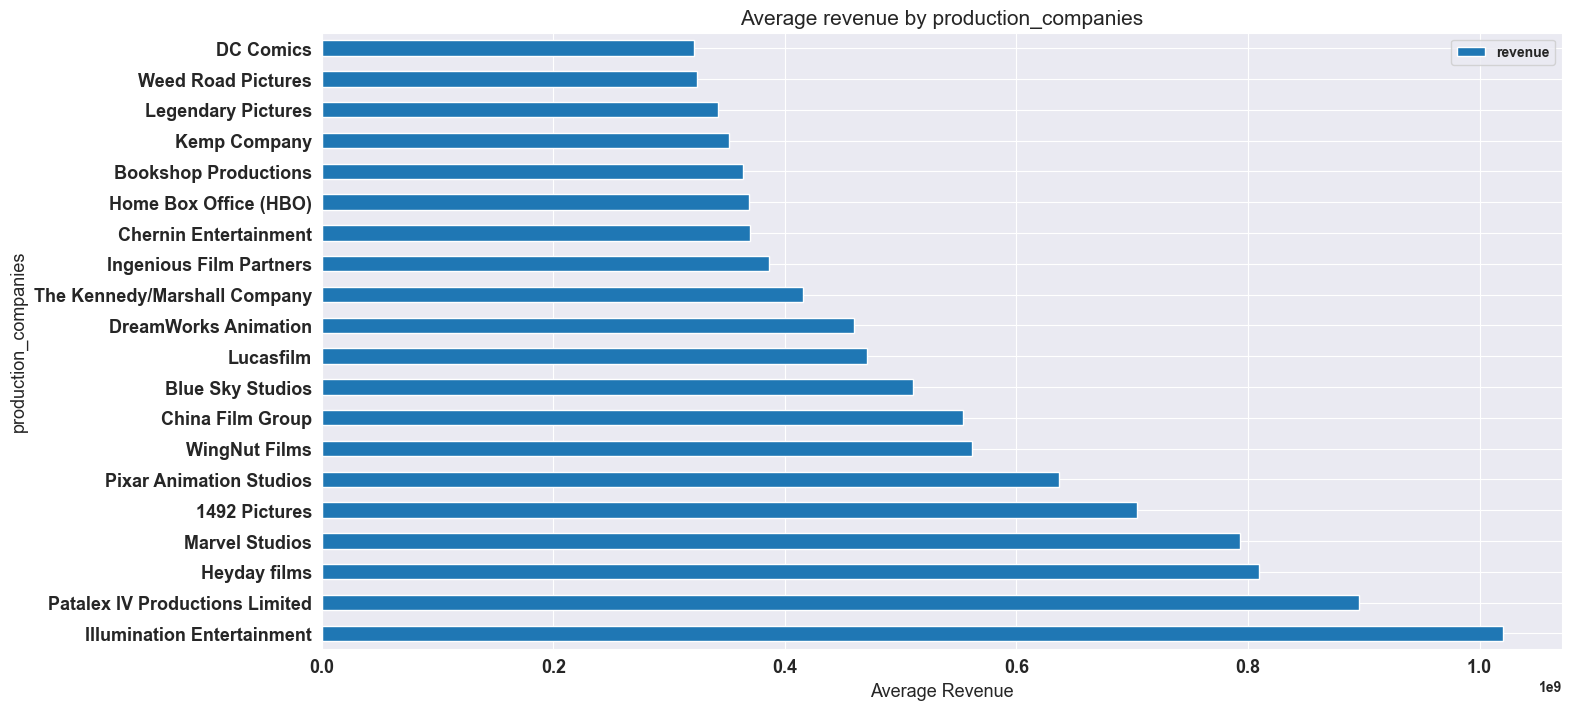

In [17]:
an.plot_average_revenue_by_prod(data)

In [18]:
data.release_date.describe()

C:\Users\ch__s\AppData\Local\Temp\ipykernel_12732\4183909318.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.release_date.describe()


count                    5192
unique                   3735
top       2010-10-09 00:00:00
freq                        7
first     1915-08-02 00:00:00
last      2017-12-05 00:00:00
Name: release_date, dtype: object

C:\Users\ch__s\OneDrive\Documents\Datamatiker cph business\4th semester\python\Exam project\MovieMatch\modules\Analyser\Analyser.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[(df['years'] < year2) & (df['years'] >= year1)].groupby(by='years').mean()['vote_average'].plot();


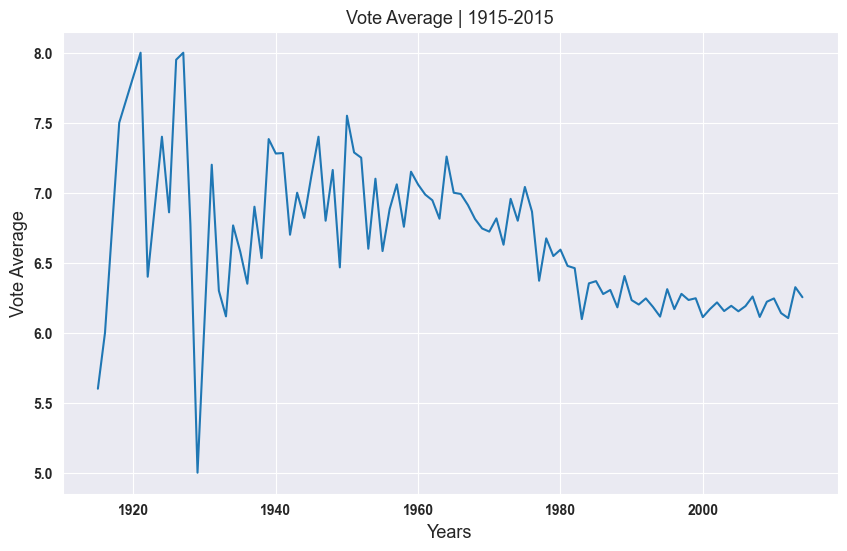

In [19]:
an.plot_vote_average_by_years(data,1915,2015)

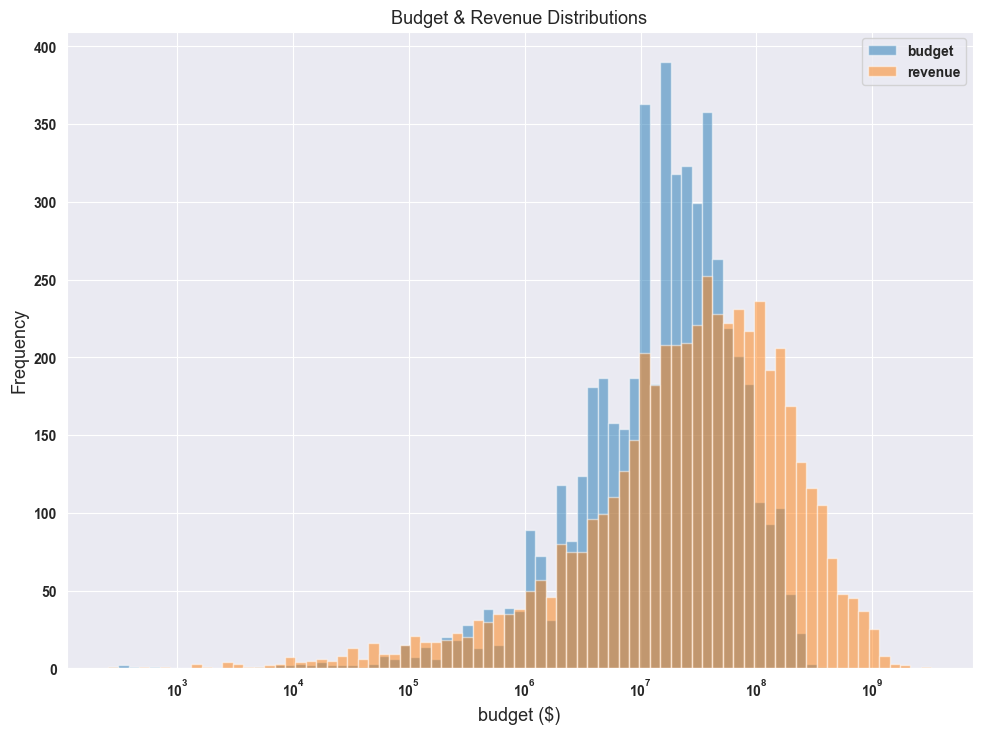

In [20]:
an.plot_distribution(data,'budget','revenue')